# 1. Print Charuco (Chessboard + Aruco images)

In [2]:
#https://mecaruco2.readthedocs.io/en/latest/notebooks_rst/Aruco/sandbox/ludovic/aruco_calibration_rotation.html
import numpy as np
import cv2, PIL, os
from cv2 import aruco
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
%matplotlib nbagg

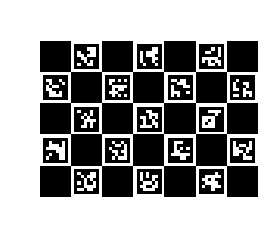

In [11]:
workdir = "C:/Users/u_imagenes/Dropbox/Python/FlirOne_Charuco/Calibration"
aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250)
board = aruco.CharucoBoard_create(7, 5, 1, .8, aruco_dict)
imboard = board.draw((2000, 2000))
cv2.imwrite(workdir + "chessboard.tiff", imboard)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.imshow(imboard, cmap = mpl.cm.gray, interpolation = "nearest")
ax.axis("off")
plt.show()

# 2. Calibrate using multiple photos from camera. 

In [12]:
datadir =  "C:/Users/EvelynG/Dropbox/Python/2. DistanceEstimator/1. Inputs/Calibration/"
images = np.array([datadir + f for f in os.listdir(datadir) if f.endswith("full photo.JPG") ])
#order = np.argsort([int(p.split("-")[-2].split("_")[-1]) for p in images])
#images = images[order]
images

array(['C:/Users/EvelynG/Dropbox/Python/2. DistanceEstimator/1. Inputs/Calibration/BPLI3377- full photo.JPG',
       'C:/Users/EvelynG/Dropbox/Python/2. DistanceEstimator/1. Inputs/Calibration/CEZU4055- full photo.JPG',
       'C:/Users/EvelynG/Dropbox/Python/2. DistanceEstimator/1. Inputs/Calibration/DMEX6272- full photo.JPG',
       'C:/Users/EvelynG/Dropbox/Python/2. DistanceEstimator/1. Inputs/Calibration/DSOF4497- full photo.JPG',
       'C:/Users/EvelynG/Dropbox/Python/2. DistanceEstimator/1. Inputs/Calibration/EHKS2407- full photo.JPG',
       'C:/Users/EvelynG/Dropbox/Python/2. DistanceEstimator/1. Inputs/Calibration/EKSW7145- full photo.JPG',
       'C:/Users/EvelynG/Dropbox/Python/2. DistanceEstimator/1. Inputs/Calibration/FCUT7451- full photo.JPG',
       'C:/Users/EvelynG/Dropbox/Python/2. DistanceEstimator/1. Inputs/Calibration/GTHH3149- full photo.JPG',
       'C:/Users/EvelynG/Dropbox/Python/2. DistanceEstimator/1. Inputs/Calibration/JXHE9625- full photo.JPG',
       'C:

In [14]:
def calibrate_camera(allCorners,allIds,imsize):
    """
    Calibrates the camera using the dected corners.
    """
    print("CAMERA CALIBRATION")

    cameraMatrixInit = np.array([[ 1000.,    0., imsize[0]/2.],
                                 [    0., 1000., imsize[1]/2.],
                                 [    0.,    0.,           1.]])

    distCoeffsInit = np.zeros((5,1))
    flags = (cv2.CALIB_USE_INTRINSIC_GUESS + cv2.CALIB_RATIONAL_MODEL + cv2.CALIB_FIX_ASPECT_RATIO)
    #flags = (cv2.CALIB_RATIONAL_MODEL)
    (ret, camera_matrix, distortion_coefficients0,
     rotation_vectors, translation_vectors,
     stdDeviationsIntrinsics, stdDeviationsExtrinsics,
     perViewErrors) = cv2.aruco.calibrateCameraCharucoExtended(
                      charucoCorners=allCorners,
                      charucoIds=allIds,
                      board=board,
                      imageSize=imsize,
                      cameraMatrix=cameraMatrixInit,
                      distCoeffs=distCoeffsInit,
                      flags=flags,
                      criteria=(cv2.TERM_CRITERIA_EPS & cv2.TERM_CRITERIA_COUNT, 10000, 1e-9))

    return ret, camera_matrix, distortion_coefficients0, rotation_vectors, translation_vectors

def read_chessboards(images):
    """
    Charuco base pose estimation.
    """
    print("POSE ESTIMATION STARTS:")
    allCorners = []
    allIds = []
    decimator = 0
    # SUB PIXEL CORNER DETECTION CRITERION
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.00001)

    for im in images:
        print("=> Processing image {0}".format(im))
        frame = cv2.imread(im)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        corners, ids, rejectedImgPoints = cv2.aruco.detectMarkers(gray, aruco_dict)

        if len(corners)>0:
            # SUB PIXEL DETECTION
            for corner in corners:
                cv2.cornerSubPix(gray, corner,
                                 winSize = (3,3),
                                 zeroZone = (-1,-1),
                                 criteria = criteria)
            res2 = cv2.aruco.interpolateCornersCharuco(corners,ids,gray,board)
            if res2[1] is not None and res2[2] is not None and len(res2[1])>3 and decimator%1==0:
                allCorners.append(res2[1])
                allIds.append(res2[2])

        decimator+=1

    imsize = gray.shape
    return allCorners,allIds,imsize

# Camera calibration
allCorners,allIds,imsize=read_chessboards(images)
%time ret, mtx, dist, rvecs, tvecs = calibrate_camera(allCorners,allIds,imsize)
mtx

POSE ESTIMATION STARTS:
=> Processing image C:/Users/EvelynG/Dropbox/Python/2. DistanceEstimator/1. Inputs/Calibration/BPLI3377- full photo.JPG
=> Processing image C:/Users/EvelynG/Dropbox/Python/2. DistanceEstimator/1. Inputs/Calibration/CEZU4055- full photo.JPG
=> Processing image C:/Users/EvelynG/Dropbox/Python/2. DistanceEstimator/1. Inputs/Calibration/DMEX6272- full photo.JPG
=> Processing image C:/Users/EvelynG/Dropbox/Python/2. DistanceEstimator/1. Inputs/Calibration/DSOF4497- full photo.JPG
=> Processing image C:/Users/EvelynG/Dropbox/Python/2. DistanceEstimator/1. Inputs/Calibration/EHKS2407- full photo.JPG
=> Processing image C:/Users/EvelynG/Dropbox/Python/2. DistanceEstimator/1. Inputs/Calibration/EKSW7145- full photo.JPG
=> Processing image C:/Users/EvelynG/Dropbox/Python/2. DistanceEstimator/1. Inputs/Calibration/FCUT7451- full photo.JPG
=> Processing image C:/Users/EvelynG/Dropbox/Python/2. DistanceEstimator/1. Inputs/Calibration/GTHH3149- full photo.JPG
=> Processing im

array([[1.21727701e+03, 0.00000000e+00, 7.40279763e+02],
       [0.00000000e+00, 1.21727701e+03, 5.35277223e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])